# Climate Analysis & Exploration

In [77]:
# Import dependencies 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [78]:
# Create engine using the 'hawaii.sqlite' database file
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)
conn = engine.connect()

In [79]:
# Declare a Base using 'automap_base()'
Base = automap_base()

In [80]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect = True)

In [81]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurements', 'stations']

In [82]:
# Assign each class to a varible
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [83]:
# Create a session
session = Session(engine)

## Precipitation Analysis

In [84]:
# Find last date in Measurements table
last_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_date = last_date[0]
last_date

'2017-08-23'

In [85]:
# Find the first date in the Measurements table
first_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
first_date = first_date.strftime("%Y-%m-%d")
first_date

'2016-08-23'

In [86]:
# Design a query to retrieve the last 12 months of precipitation data
one_yr_prcp = session.query(Measurements.date, Measurements.prcp).\
filter(Measurements.date.between(first_date, last_date)).all()
print(one_yr_prcp[:5])

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0)]


In [89]:
# Turn results from query into pandas df
one_yr_prcp_df = pd.DataFrame(one_yr_prcp)
one_yr_prcp_df = one_yr_prcp_df.set_index('date')
one_yr_prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


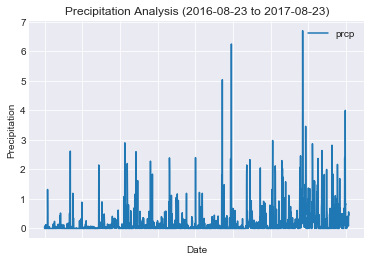

In [90]:
sns.set_style("darkgrid")
one_yr_prcp_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title(f"Precipitation Analysis ({first_date} to {last_date})")
plt.xticks(rotation=45)
plt.show()

In [91]:
# Use pandas to print the summary statistics for the precipitation data
one_yr_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [92]:
# Design a query to calculate the total number of station
total_stations = session.query(Stations.station).count()
print(f"The total number of stations is: {total_stations}.")

The total number of stations is: 9.


In [93]:
# Design a query to find the most active stations
# List the stations and observation counts in descending order
active_stations = session.query(Measurements.station, Stations.name, func.count(Measurements.tobs)).\
filter(Measurements.station == Stations.station).\
group_by(Measurements.station).\
order_by(func.count(Measurements.tobs).desc()).all()
active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2696),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2685),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2572),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2484),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 1937),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1932),
 ('USC00517948', 'PEARL CITY, HI US', 683),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 342)]

In [94]:
# Which station has the highest number of observations
most_active_station = active_stations[0]
most_active_station_name = most_active_station[0]
most_active_station_loc = most_active_station[1]
most_active_station_obs = most_active_station[2]
print(f"The most active station is {most_active_station_name}\
 in {most_active_station_loc} with {most_active_station_obs} observations.")

The most active station is USC00519281 in WAIHEE 837.5, HI US with 2772 observations.


In [95]:
# Design a query to retrieve the last 12 months of temperature
# observation data (tobs)
# Filter by station with the highest number of observations
one_yr_tobs = session.query(Measurements.station, Measurements.date, Measurements.tobs).\
filter(Measurements.date.between('2016-08-23', '2017-08-23')).\
filter(Measurements.station == most_active_station_name).all()
one_yr_tobs

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

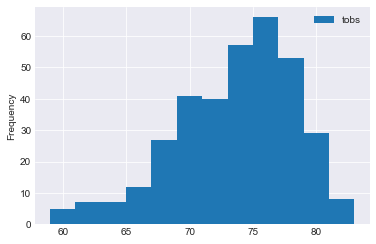

In [96]:
# Plot the results as a histogram with 12 bins
one_yr_tobs_df = pd.DataFrame(one_yr_tobs)
plt.hist(one_yr_tobs_df["tobs"], bins = 12)
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

## Temperature Analysis

In [97]:
# Write a function called calc_temps that will accept a start date and end date
# in the format %Y-%m-$d and return minimum, average, and maximum temperatures for 
# range of dates.
# Use the calc_temps fuction to calculate the min, avg, and max temperatures for 
# your trip using the matching dates from the previous year (ie: use 2017-01-01
# if your trip start date was 2018-01-01).

def calc_temps (start_date, end_date):
    temp_queries = session.query(func.min(Measurements.tobs),\
                             func.round(func.avg(Measurements.tobs)),\
                             func.max(Measurements.tobs)).\
    filter(Measurements.date.between(start_date, end_date)).all()
    
    min_temp = temp_queries[0][0]
    avg_temp = temp_queries[0][1]
    max_temp = temp_queries[0][2]
    
    
    print(f"Minimum Temperature: {min_temp}.")
    print(f"Average Temperature: {avg_temp}.")
    print(f"Maximum Temperature: {max_temp}.")
    
    return {"Minimum": min_temp, "Average": avg_temp, "Maximum": max_temp}

prev_start_date = "2017-06-15"
prev_end_date = "2017-06-25"
prev_yr_temps = calc_temps(prev_start_date, prev_end_date)
prev_yr_temps

Minimum Temperature: 71.0.
Average Temperature: 77.0.
Maximum Temperature: 82.0.


{'Average': 77.0, 'Maximum': 82.0, 'Minimum': 71.0}

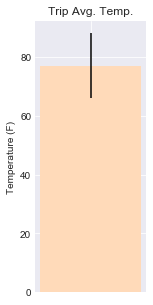

In [98]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height
# Use the peak to peak (tmax-tmin) values as the y error bar(yerr)

plt.figure(figsize = (2, 5))
plt.title("Trip Avg. Temp.")
plt.ylabel("Temperature (F)")
plt.bar(1, prev_yr_temps["Average"], yerr = int(prev_yr_temps["Maximum"] - prev_yr_temps["Minimum"]), tick_label = "", color = "#FFDAB9")
plt.show()